In [241]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
import matplotlib.animation as animation

plt.style.use('dark_background')

# Fonctions

In [242]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [243]:
def forward_propagation(X, parametres):
  
  activations = {'A0': X}

  C = len(parametres) // 2

  for c in range(1, C + 1):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

  return activations

In [244]:
def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

In [245]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [246]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
    #print(Af)
  return Af >= 0.5

In [247]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return parametres, training_history # Return both parametres and training_history

## CHIEN vs. CHAT

### Dataset

In [248]:
from utilities import *

In [249]:
X_train, y_train, X_test, y_test = load_data()

In [250]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [251]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


### Entrainement du Réseau

In [252]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_train_reshape.shape

(1000, 4096)

In [253]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
X_test_reshape.shape

(200, 4096)

In [254]:
print(X_train_reshape.shape)
print(y_train.shape)

(1000, 4096)
(1000, 1)


In [255]:
X_train_reshape = X_train_reshape.T 
y_train = y_train.T

100%|██████████| 3000/3000 [00:27<00:00, 108.23it/s]


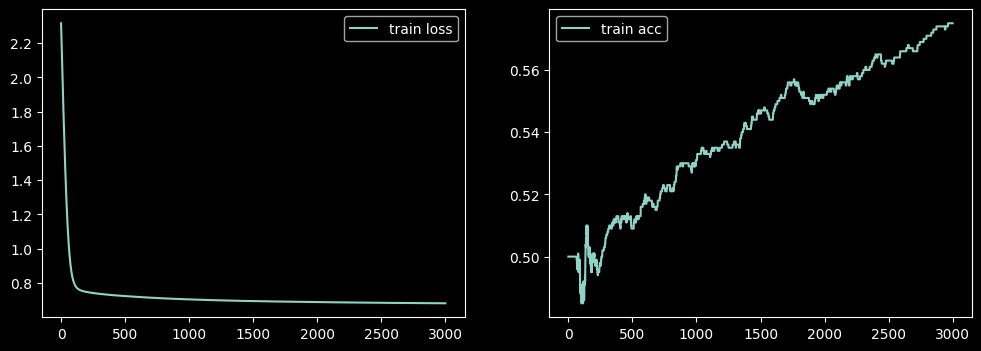

In [256]:
# Call deep_neural_network and get the returned parametres
parametres, training_history = deep_neural_network(X_train_reshape, y_train, hidden_layers = (16, 16, 16), learning_rate = 0.01, n_iter = 3000)

### Test avec mon chat : Bagui

In [257]:
from PIL import Image
import numpy as np

img = Image.open('cat.jpg') # ouvrir l'image
img = img.resize((64, 64)) # redimensionner l'image, exemple : 64x64 pixels 
img = np.array(img) # convertir l'image en tableau numpy
img = img / 255 # normaliser les valeurs des pixels

#la shape de l'image est pour le moment de (64, 64, 3) car c'est une image en couleur
#il faut la transformer en image en noir et blanc
img = img.mean(axis=2) # transformer l'image en noir et blanc en moyennant les valeurs des 3 canaux RGB
print(img.shape)

# on veut que la shape soit de (1, 4096) donc on applatit l'image
img_reshape = img.reshape(1, -1) 
# en gros, on a transformé l'image en un tableau de 1 ligne et 4096 colonnes
print(img_reshape.shape)


(64, 64)
(1, 4096)


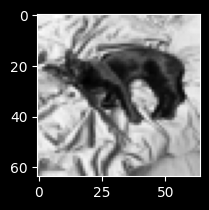

In [258]:
plt.figure(figsize=(16, 8))   
plt.subplot(4, 5, 1)
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

In [259]:
X_train_reshape = X_train_reshape.T 
y_train = y_train.T

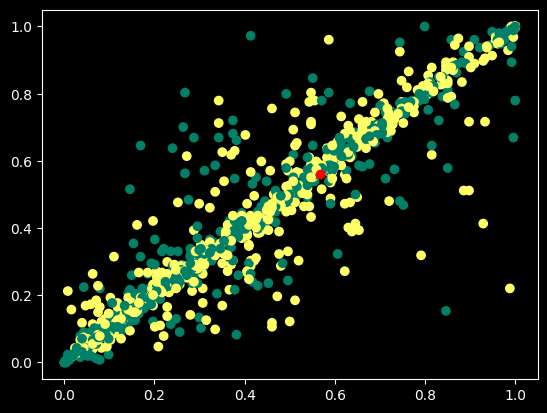

In [260]:
plt.scatter(X_train_reshape[:,0], X_train_reshape[:, 1], c=y_train, cmap='summer')
plt.scatter(img_reshape[:,0], img_reshape[:,1], c='red')
plt.show()

# position de l'image dans l'espace des données que l'on a utilisé pour entrainer le modèle

In [261]:
# on transpose l'image pour avoir la shape (4096, 1)
img_reshape = img_reshape.T
print(img_reshape.shape)

(4096, 1)


In [262]:
def traduction(p):
    if p[0]:
        print("C'est une photo d'un chien !")
    else:
        print("C'est une photo d'un chat !")

'''Prediction de si c'est un chat ou un chien'''
p = predict(img_reshape, parametres)

traduction(p)

C'est une photo d'un chat !


In [263]:
print(X_train_reshape.shape)
print(y_train.shape)

(1000, 4096)
(1000, 1)


### Test avec une Image de Chien

In [264]:
img2 = Image.open('dog.jpg') # ouvrir l'image
img2 = img2.resize((64, 64)) # redimensionner l'image, exemple : 64x64 pixels 
img2 = np.array(img2) # convertir l'image en tableau numpy
img2 = img2 / 255 # normaliser les valeurs des pixels

#la shape de l'image est pour le moment de (64, 64, 3) car c'est une image en couleur
#il faut la transformer en image en noir et blanc
img2 = img2.mean(axis=2) # transformer l'image en noir et blanc en moyennant les valeurs des 3 canaux RGB
print(img2.shape)

# on veut que la shape soit de (1, 4096) donc on applatit l'image
img_reshape2 = img2.reshape(1, -1) 
# en gros, on a transformé l'image en un tableau de 1 ligne et 4096 colonnes
print(img_reshape2.shape)

(64, 64)
(1, 4096)


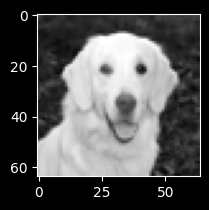

In [265]:
plt.figure(figsize=(16, 8))   
plt.subplot(4, 5, 1)
plt.imshow(img2, cmap='gray')
plt.tight_layout()
plt.show()

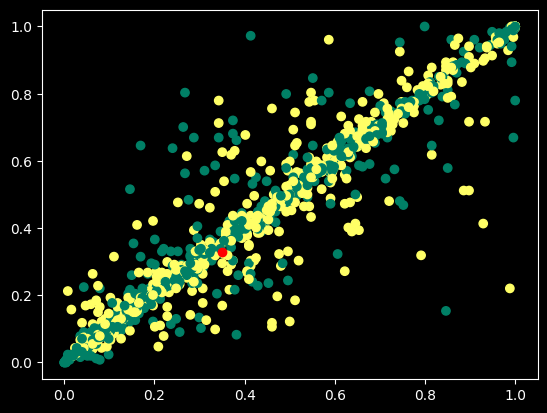

In [266]:
plt.scatter(X_train_reshape[:,0], X_train_reshape[:, 1], c=y_train, cmap='summer')
plt.scatter(img_reshape2[:,0], img_reshape2[:,1], c='red')
plt.show()

In [267]:
# on transpose l'image pour avoir la shape (4096, 1)
img_reshape2 = img_reshape2.T
print(img_reshape2.shape)

(4096, 1)


In [268]:
p = predict(img_reshape2, parametres)
traduction(p)

C'est une photo d'un chien !
